In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(123)

get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")

In this notebook, I implemented the rejection sampling algorithm and applied it to a toy problem.

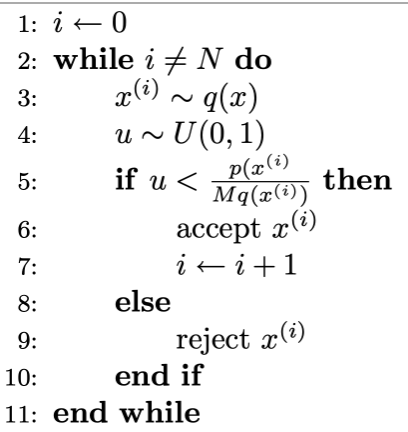

https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture17.pdf

Define a target distribution:

In [2]:
def p(x):
    """the probability distribution to draw samples from."""
    pr1 = scipy.stats.norm.pdf(x, loc=-1, scale=3)
    pr2 = scipy.stats.norm.pdf(x, loc=5, scale=2)
    pr3 = scipy.stats.norm.pdf(x, loc=15, scale=1.5)
    z = 3
    return (pr1 + pr2 + pr3) / z

In [3]:
def q(x, q_func):
    """The scaled distribution that covers p."""
    return q_func.pdf(x)

In [4]:
def sample_q(q_func):
    return q_func.rvs(1)[0]

In [5]:
xs = np.linspace(-20, 20, 1000)

In [6]:
M = 8

In [7]:
q_func = scipy.stats.norm(loc=0, scale=10)

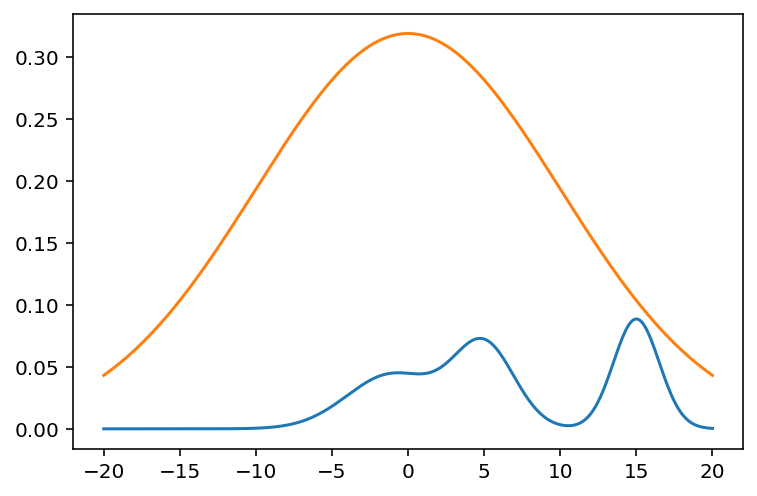

In [8]:
plt.plot(xs, p(xs))
plt.plot(xs, M * q(xs, q_func))

In [9]:
accepted_samples = []
rejected_samples = []

for i in tqdm(range(10000)):
    x = sample_q(q_func)
    u = np.random.uniform(low=0, high=1, size=1)
    ratio = p(x) / (M * q(x, q_func))
    
    if u < ratio:
        accepted_samples.append(x)
    else:
        rejected_samples.append(x)

100%|██████████| 10000/10000 [00:07<00:00, 1368.37it/s]


In [10]:
print(len(accepted_samples))
print(len(rejected_samples))

1286
8714


Visualize accepted samples:

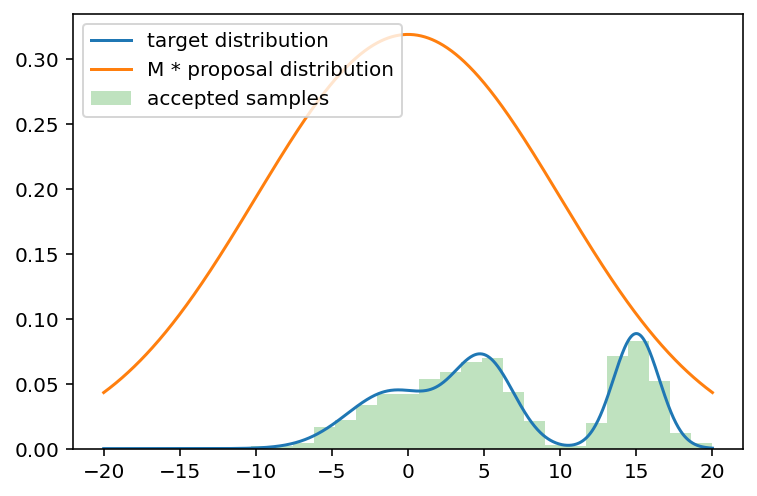

In [11]:
plt.plot(xs, p(xs), label="target distribution")
plt.plot(xs, M * q(xs, q_func), label="M * proposal distribution")

bins = np.linspace(-20, 20, 30)
_ = plt.hist(accepted_samples, bins=bins, density=True, alpha=0.3, label='accepted samples')
plt.legend(loc='upper left')

Visualize rejected samples:

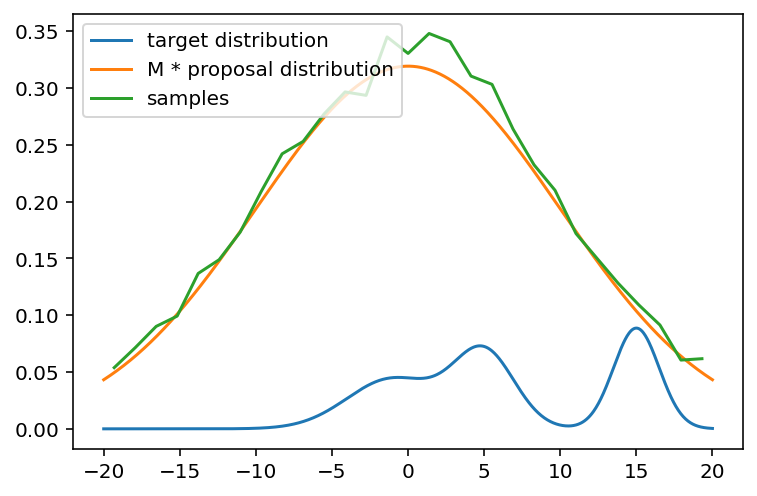

In [12]:
plt.plot(xs, p(xs), label="target distribution")
plt.plot(xs, M * q(xs, q_func), label="M * proposal distribution")

bins = np.linspace(-20, 20, 30)
hist, bins = np.histogram(accepted_samples + rejected_samples, bins=bins, density=True)
plt.plot((bins[1:] + bins[:-1]) / 2, M * hist, label="samples")

plt.legend(loc='upper left')